In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import statsmodels.api as sm
from scipy.spatial import ConvexHull
from scipy.stats import normaltest, shapiro, anderson, norm, t as t_stud
from sklearn.decomposition import PCA

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!pip install scikit-plot

In [3]:
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [24]:
def plot_multiclass_roc(clf, X, y, clf_name='', ax=None):
    if not isinstance(y, type(np.array([]))):
        y = y.values
    if ax is None:
        fig = plt.figure(figsize = (6, 4))
        ax = fig.add_subplot()
    y_pred_proba = clf.predict_proba(X)   
    for i, label in enumerate(np.unique(y)):
        class_i_arr = (y == label).astype(int)
        class_i_prob_arr = y_pred_proba[:, i]
        RocCurveDisplay.from_predictions(class_i_arr, class_i_prob_arr,
                        name = clf_name + f'class {label}', ax = ax)
    random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    ax.set_xlabel('False Positive Rate', fontsize = 14)
    return ax

In [4]:
# we use the dataset without duplicated columns

X_train = pd.read_csv('X_train_no_red.csv', header = 0)
y_train = pd.read_fwf('y_train.txt', header = None)
X_test = pd.read_csv('X_test_no_red.csv', header = 0)
y_test = pd.read_fwf('y_test.txt', header = None)

In [5]:
X_train.columns = X_train.columns.astype(int)
X_test.columns = X_test.columns.astype(int)

In [6]:
with open("features.txt") as f:
    lines = f.read().splitlines()

In [7]:
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [8]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

In [9]:
def plot_confusion_mtx(cm: 'confusion matrix', labels = None, 
                       figsize = (3,3), binary = True):
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot()
    sns.heatmap(cm, annot = True, fmt = '0', annot_kws = {"fontsize": 16}, 
                cmap = "Blues", cbar = False, ax = ax)
    ax.set_xlabel('Predicted Class', fontsize = 14)
    ax.set_ylabel('Actual Class', fontsize = 14)
    if labels is None:
        labels = range(1, cm.shape[1] + 1)     
    ax.set_xticks(ax.get_xticks(), labels)
    ax.set_yticks(ax.get_yticks(), labels)
    if binary:
        ax.set_xticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.set_yticks([0.5,1.5], [r'+', r'$-$'], fontsize = 18)
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')

In [10]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [12]:
%%time

params= {
    'loss' : ["log_loss"],
    'learning_rate' : [ 0.1,0.6,1.1],
    'n_estimators': [100 , 200],
    'subsample' : [ 0.5 ,1.0 ]
    }

clf = GradientBoostingClassifier()
obj=RandomizedSearchCV(clf, params, random_state=0)
search= obj.fit(X_train, y_train)
search.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

FILLA LO SCRIPT DI SOTTO CON I RISULTATI DELLA GRID SEARCH

In [13]:
clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=activities.values()))


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
plot_confusion_mtx(cm, binary = False)

In [ ]:
#Con i codi ci qui sotto vado a calcolare l'accuracy sui dati di train e
#di test er vedere se abbiamo overfitting

clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)
clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
train_acc=accuracy_score(y_train, y_train_pred)
print("Accuracy sul training", train_acc)
error_train=(1-train_acc)
print("L'errore sul train ottenuto equivale a: %", error_train)
print("______________________________________")



print()

clf = GradientBoostingClassifier(loss= "log_loss", learning_rate=0.1, n_estimators=200, subsample=0.5)
clf.fit(X_test, y_test)
y_test_pred=clf.predict(X_test)
test_acc=accuracy_score(y_test, y_test_pred)
print("Accuracy sul test", test_acc)
error_test=(1-test_acc)
print("L'errore sul train ottenuto equivale a: %", error_test)

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Gradient Boosting')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [14]:
!pip install imblearn

In [15]:
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, TomekLinks

In [16]:
rus=RandomUnderSampler()
X_res, y_res= rus.fit_resample(X_train,y_train)
Counter(y_res)

Counter({0: 1})

In [17]:
clf1=GradientBoostingClassifier()
clf1.fit(X_res, y_res)
y_pred=clf1.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average=None))
print(classification_report(y_pred, y_test))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9314557176789956
F1-score:  [0.94591937 0.91648822 0.94275274 0.88160677 0.89836661 1.        ]
              precision    recall  f1-score   support

           1       0.97      0.92      0.95       521
           2       0.91      0.92      0.92       463
           3       0.92      0.97      0.94       401
           4       0.85      0.92      0.88       455
           5       0.93      0.87      0.90       570
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



NameError: name 'RocCurveDisplay' is not defined

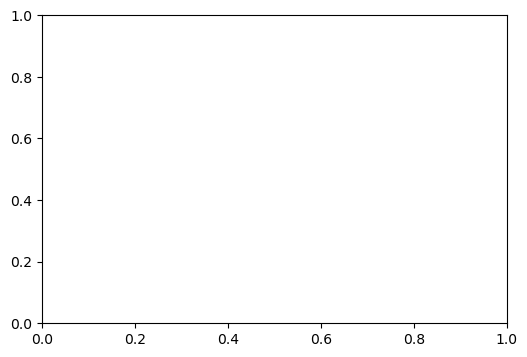

In [26]:
ax = plot_multiclass_roc(clf1, X_test, y_test)
ax.legend(fontsize='10')
plt.show()

# LIGHT GBM

In [20]:
!pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
     -------------                            0.5/1.3 MB 14.2 MB/s eta 0:00:01
     ------------------------------           1.0/1.3 MB 12.7 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 10.4 MB/s eta 0:00:00


In [21]:
from lightgbm import LGBMClassifier

In [22]:
clf9 = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='binary',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
#boosting_type: indica l'algoritmo di boosting utilizzato per addestrare il modello. Nella configurazione attuale, l'algoritmo scelto è gbdt, che indica Gradient Boosting Decision Tree.
#max_depth: indica la massima profondità consentita per ciascun albero decisionale utilizzato nel modello. In questo caso, non c'è alcun limite sulla profondità massima degli alberi.
#num_leaves: indica il numero di foglie per albero decisionale utilizzato nel modello.
#n_estimators: indica il numero di alberi decisionali da utilizzare nell'ensemble. In questo caso, sono utilizzati 100 alberi decisionali.
#subsample_for_bin: indica il numero di campioni da utilizzare per la discretizzazione delle feature continue. In questo caso, sono utilizzati 200000 campioni.
#objective: indica la funzione di loss utilizzata per addestrare il modello. In questo caso, l'obiettivo è la classificazione binaria e la funzione di loss utilizzata è binary.
#reg_alpha: indica il termine di regolarizzazione L1 sui pesi degli alberi. In questo caso, il valore è impostato a 0, il che significa che non c'è regolarizzazione L1.
#reg_lambda: indica il termine di regolarizzazione L2 sui pesi degli alberi. In questo caso, il valore è impostato a 0, il che significa che non c'è regolarizzazione L2.
#random_state: indica il seed per la generazione di numeri casuali, che consente di riprodurre i risultati degli esperimenti in modo deterministico. In questo caso, il seed è impostato a 42.
clf9.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LightGBMError: Number of classes must be 1 for non-multiclass training

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = clf9.classes_)
plot_confusion_mtx(cm, binary = False)